# Análisis de la evolción del coche eléctrico

- [Repositorio Github](https://github.com/albertogparrado/DataSet-Python-VIU)

# Índice

- [Análisis de la evolución del coche eléctrico](#análisis-de-la-evolción-del-coche-eléctrico)
    - [Introducción](#introducción)
    - [Preparación del entorno](#preparación-del-entorno)
        - [Carga del DataSet principal](#carga-del-dataset-principal)
    - [Primera observación del DataSet](#primera-observación-del-dataset)
    - [Años de los datos](#años-de-los-datos)
    - [Filtramos por ventas](#filtramos-por-ventas)
    - [Comparativa de ventas MUNDIALES entre las diferentes tecnologias](#comparativa-de-ventas-mundiales-entre-las-diferentes-tecnologias)
        - [Conclusiones sobre el gráfico](#conclusiones-sobre-el-gráfico)
        - [¿En que mercado funciona mejor el coche eléctrico?](#¿en-que-mercado-funciona-mejor-el-coche-eléctrico?)
        - [Análisis del gráfico de ventas de coches 100% eléctricos por país.](#análisis-del-gráfico-de-ventas-de-coches-100-eléctricos-por-país.)
            - [Gráfica porcentaje de coches eléctricos en China por persona](#gráfica-porcentaje-de-coches-eléctricos-en-china-por-persona)
            - [Conclusiones](#conclusiones)
        - [Comparativa de los coches eléctricos respecto a las ventas totales de coches](#comparativa-de-los-coches-eléctricos-respecto-a-las-ventas-totales-de-coches)
        - [Conclusiones porcentaje de coches 100% eléctrico por país](#conclusiones-porcentaje-de-coches-100-eléctrico-por-país)
    - [Análisis del mercado español](#análisis-del-mercado-español)
        - [Conclusiones sobre el mercado español](#conclusiones-sobre-el-mercado-español)
        - [Conclusiones sobre los porcentajes de cuota de mercado en España](#conclusiones-sobre-los-porcentajes-de-cuota-de-mercado-en-españa)
    - [Conclusiones finales sobre la evolución de las ventas de coches eléctricos](#conclusiones-finales-sobre-la-evolución-de-las-ventas-de-coches-eléctricos)
        - [Bibliografia](#bibliografia)

## Introducción

El mercado del coche eléctrico ha experimentado una profunda transformación en la última década, impulsado por la innovación tecnológica, la creciente preocupación medioambiental y el desarrollo de políticas públicas orientadas a la descarbonización del transporte. El análisis de la evolución de las ventas de vehículos eléctricos permite comprender no solo el ritmo de adopción de estas tecnologías, sino también las diferencias entre mercados y las barreras que aún persisten.

En este trabajo, realizaremos un estudio detallado sobre la evolución del coche eléctrico a nivel global y nacional, centrándonos especialmente en el caso de España. Analizaremos la evolución de las ventas de vehículos eléctricos puros (BEV), híbridos enchufables (PHEV) y de pila de combustible (FCEV), comparando su penetración en distintos países.

El objetivo principal es identificar tendencias, patrones y diferencias significativas entre mercados.Finalmente, extraeremos conclusiones sobre el estado actual y las perspectivas de futuro del sector, aportando una visión crítica sobre los retos y oportunidades que afronta.

# Preparación del entorno

Antes de empzar con el análisis de los datos procederemos a realizar la instalación de las herramientas necesarias

In [87]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Carga del DataSet principal

In [89]:
#carga del archivo CSV
df = pd.read_csv('IEA-EV-dataEV salesHistoricalCars.csv')

#numero de filas
num_rows = df.shape[0]
print(f"Numero de filas en el conjunto de datos: {num_rows}")

#numero de columnas
num_cols = df.shape[1]
print(f"Numero de columnas en el conjunto de datos: {num_cols}")

#mostrar filas aleatorias
random_rows = df.sample(n=5)
display(random_rows)

df.info()
df.describe()
df.columns


Numero de filas en el conjunto de datos: 3798
Numero de columnas en el conjunto de datos: 8


,region,category,parameter,mode,powertrain,year,unit,value
2906,Seychelles,Historical,EV sales share,Cars,EV,2020,percent,3.300
2169,Latvia,Historical,EV sales,Cars,BEV,2016,Vehicles,22.000
2944,Slovenia,Historical,EV sales share,Cars,EV,2018,percent,0.910
1692,India,Historical,EV stock share,Cars,EV,2014,percent,0.013
2162,Korea,Historical,EV stock share,Cars,EV,2023,percent,2.300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [90]:
# ¿Que regiones distintas hay en el conjunto de datos?
unique_regions = df['region'].unique()
for region in unique_regions:
    print(f"{region} \n")


Australia 

Austria 

Belgium 

Brazil 

Bulgaria 

Canada 

Chile 

China 

Colombia 

Costa Rica 

Croatia 

Cyprus 

Czech Republic 

Denmark 

Estonia 

EU27 

Europe 

Finland 

France 

Germany 

Greece 

Hungary 

Iceland 

India 

Ireland 

Israel 

Italy 

Japan 

Korea 

Latvia 

Lithuania 

Luxembourg 

Mexico 

Netherlands 

New Zealand 

Norway 

Poland 

Portugal 

Rest of the world 

Romania 

Seychelles 

Slovakia 

Slovenia 

South Africa 

Spain 

Sweden 

Switzerland 

Turkiye 

United Arab Emirates 

United Kingdom 

USA 

World 



# Primera observación del DataSet y limpieza del mismo

Al analizar el conjunto de datos, se observa que incluye registros correspondientes tanto a países individuales como a continentes y al total mundial. Por este motivo, el primer paso consistirá en depurar la información, eliminando las filas relativas a continentes y al mundo, con el objetivo de trabajar exclusivamente con datos a nivel de

In [91]:
# Eliminar las filas que "region" = "EU27", "Europe", "Rest of the world", "World"
valores_a_eliminar = ["EU27", "Europe", "Rest of the world", "World"]

# Número de filas antes de eliminar
num_filas_antes = df.shape[0]
print("💾 Filas antes de eliminar:", num_filas_antes)

# Eliminar filas
df_countries = df[~df["region"].isin(valores_a_eliminar)]

# Número de filas después de eliminar
num_filas_despues = df_countries.shape[0]
print("💾✂️ Filas después de eliminar:", num_filas_despues)

# Tipos de region unicas
tipos_region_unicas = df_countries["region"].unique()
display(tipos_region_unicas)

💾 Filas antes de eliminar: 3798
💾✂️ Filas después de eliminar: 3254


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Turkiye', 'United Arab Emirates', 'United Kingdom', 'USA'],
      dtype=object)

## Años de los datos

Se observa que el conjunto de datos abarca registros desde el año 2010 hasta 2023. Este rango temporal resulta especialmente relevante, ya que permite realizar comparativas y contrastes con otros conjuntos de datos disponibles para periodos

In [92]:
print(sorted(df_countries["year"].unique()))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## Filtramos por ventas

El conjunto de datos contiene diferentes tipos de información, como stock, participación en el stock, ventas y cuota de ventas. Dado que el objetivo de este estudio es analizar las ventas de coches y comparar la cuota de mercado de los vehículos eléctricos año a año, filtraremos el dataset para conservar únicamente aquellas filas en las que la columna "parameter" sea igual a "EV sales".

In [93]:
num_rows = df_countries.shape[0]
print(f"💾 Numero de filas totales: {num_rows}")

df_sales = df_countries[df_countries["parameter"] == "EV sales"]
num_rows = df_sales.shape[0]
print(f"💾✂️ Numero de filas solamente de ventas: {num_rows}")

display(df_sales)


💾 Numero de filas totales: 3254
💾✂️ Numero de filas solamente de ventas: 1189


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
6,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
9,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
10,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
13,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
...,...,...,...,...,...,...,...,...
3629,USA,Historical,EV sales,Cars,FCEV,2022,Vehicles,2700.0
3630,USA,Historical,EV sales,Cars,BEV,2022,Vehicles,800000.0
3635,USA,Historical,EV sales,Cars,BEV,2023,Vehicles,1100000.0
3636,USA,Historical,EV sales,Cars,FCEV,2023,Vehicles,3000.0


# Comparativa de ventas MUNDIALES entre las diferentes tecnologias

![Paises con más ventas de coches eléctricos](https://venair.com/uploads/1075x1075p/2023/09/20/VPLt8VcV3WxUKr8IQOqaECxaIsYhCB2uXdAXOluz.png)

- **BEV:** vehículo eléctrico de batería
- **PHEV:** vehículo híbrido enchufable
- **FCEV:** vehículo eléctrico de pila de combustible

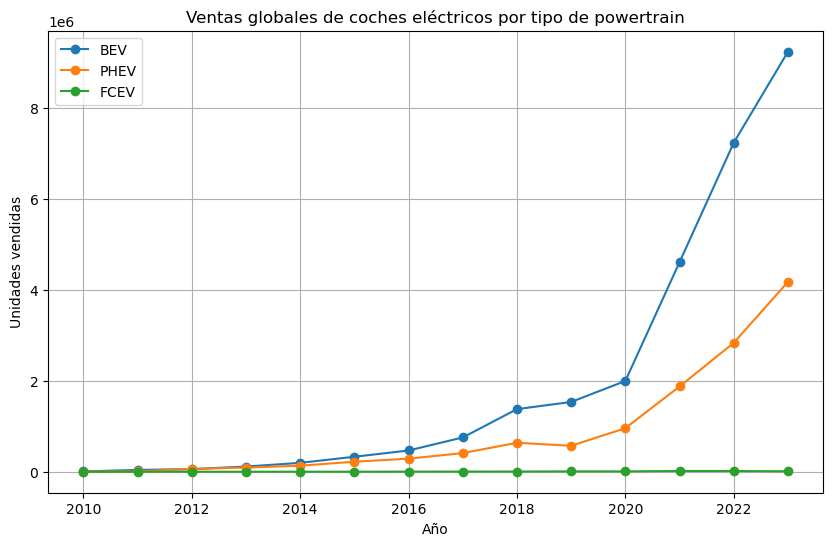

In [94]:
global_bev = df_sales[df_sales['powertrain'] == 'BEV'].groupby('year')['value'].sum()
global_phev = df_sales[df_sales['powertrain'] == 'PHEV'].groupby('year')['value'].sum()
global_fcev = df_sales[df_sales['powertrain'] == 'FCEV'].groupby('year')['value'].sum()

plt.figure(figsize=(10,6))
plt.plot(global_bev.index, global_bev.values, marker='o', label='BEV')
plt.plot(global_phev.index, global_phev.values, marker='o', label='PHEV')
plt.plot(global_fcev.index, global_fcev.values, marker='o', label='FCEV')
plt.title('Ventas globales de coches eléctricos por tipo de powertrain')
plt.xlabel('Año')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones sobre el gráfico

Viendo los resultados, podemos ver como los vehículos eléctricos de pila de combustible han sido un fracaso, ya que las ventas no han subido ningún año y se aproximan al 0.

También podemos ver como a partir de 2016 ha habido un incremento notable de las ventas pasando de una recta constante a una exponencial, sobre todo en los 100% eléctricos (BEV).

Y por último, también podemos destacar  el gran crecimiento de los coches 100% respecto a los híbridos enchufables, cosa que personalmente me ha sorprendido, ya que siempre se ha vendido que los hibrídos enchfables iban a ser el futuro por su versatilidad de tener un motor de combustión con mayor autonomía y un eléctrico para consumir menos en cortas distancias, pero viendo el gráfico, podemos ver donde los hibridos enchufables nunca han superado a los 100% eléctricos.

Como curiosidad, he buscado noticias sobre los electricos publicadas en 2016, y podido encontrar varios estudios donde ya prevehían este incremento de las ventas de los coches 100% eléctricos por la mejora y el abaratamiento de las baterias además de la publicación de diferentes leyes donde prohibían la venta del coche de combustión entre los años 2025-2030.

- [El mercado del vehículo eléctrico de 2016 a 2025](https://movilidadelectrica.com/el-mercado-del-vehiculo-electrico/)
- [Holanda continúa con el objetivo de prohibir la venta de coches diésel y gasolina en 2025](https://forococheselectricos.com/2016/08/holanda-continua-con-el-objetivo-de-prohibir-la-venta-de-coches-convencionales-en-2025.html)

### ¿En que mercado funciona mejor el coche eléctrico?

Tras ver la evolución global de las 3 tecnologias, vamos a analizar en que mercado funciona mejor el coche eléctrico.

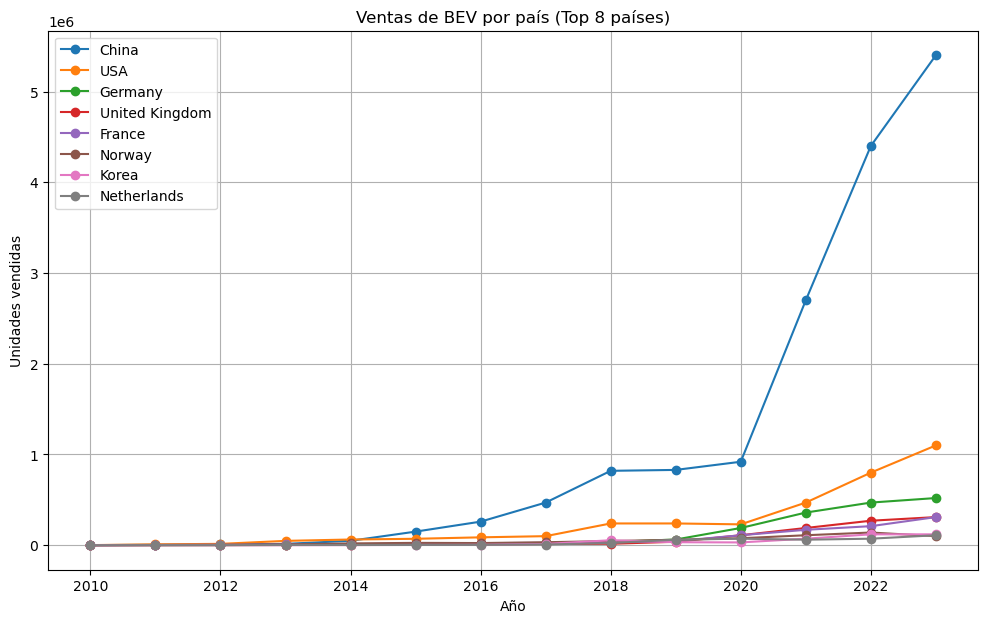

In [95]:
# Agrupar las ventas de BEV por país y año
bev_by_country = df_sales[df_sales['powertrain'] == 'BEV'].groupby(['region', 'year'])['value'].sum().reset_index()

# Seleccionar los países con mayores ventas totales para visualizar mejor el gráfico
top_countries = bev_by_country.groupby('region')['value'].sum().sort_values(ascending=False).head(8).index
bev_top_countries = bev_by_country[bev_by_country['region'].isin(top_countries)]

plt.figure(figsize=(12,7))
for country in top_countries:
    data = bev_top_countries[bev_top_countries['region'] == country]
    plt.plot(data['year'], data['value'], marker='o', label=country)

plt.title('Ventas de BEV por país (Top 8 países)')
plt.xlabel('Año')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True)
plt.show()

## Análisis del gráfico de ventas de coches 100% eléctricos por país.

Para poder entener este gráfico tenemos que tener en cuenta la cantidad de personas que viven en cada país, por lo que no es lo mismo que el coche eléctrico represente un 10% de las ventas en China con una població de 1,411 miles de millones en 2020 que en Holanda con 17,44 millones de personas.

En primer lugar sí que podemos destar la gran aceleción de ventas de eléctricos en dos grandes mercados como son China y EEUU desde 2020 hasta 2023.

Tras analizar difernetes noticias publicadas en 2020, podemos decir que el mercado chino de vehículos eléctricos experimentó un punto de inflexión, superando el millón de ventas. Varios factores impulsaron este crecimiento, incluyendo el apoyo gubernamental con subsidios y políticas que fomentaron la adopción de vehículos eléctricos. Además, la mejora de la infraestructura de carga y la creciente conciencia ambiental entre los consumidores también jugaron un papel importante. 

### Gráfica porcentaje de coches eléctricos en China por persona

Para hacer una comparativa que represente la adopción del coche eléctrico por país cargaremos este [DataSet](https://datos.bancomundial.org/indicador/SP.POP.TOTL?end=2023&start=1960&view=chart) con el que podremos ver la poblacion de cada pais y por año, de esa manera podemos ver el porcentaje de poblacion que usa un coche eléctrico.


In [96]:
df_poblacion = pd.read_csv('poblacion.csv', skiprows=4)
display(df_poblacion)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Población, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,NaN,AFE,"Población, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,NaN,AFW,"Población, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Población, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Población, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0,NaN,NaN
262,"Yemen, Rep. del",YEM,"Población, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,NaN,NaN
263,Sudáfrica,ZAF,"Población, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,NaN,NaN
264,Zambia,ZMB,"Población, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,NaN,NaN


In [97]:

# Eliminar columnas innecesarias
columnas_a_eliminar = ['Country Code', 'Indicator Name', 'Indicator Code']
# Eliminar también los años desde 1960 hasta 2009 (inclusive)
anios_a_eliminar = [str(a) for a in range(1960, 2010)]
columnas_a_eliminar.extend(anios_a_eliminar)

df_poblacion = df_poblacion.drop(columns=columnas_a_eliminar)

display(df_poblacion)


,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,101838.0,102591.0,104110.0,105675.0,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,NaN,530308387.0,544737983.0,559609961.0,575202699.0,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afganistán,28284089.0,29347708.0,30560034.0,31622704.0,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,NaN,364358270.0,374790143.0,385360349.0,396030207.0,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,23294825.0,24218352.0,25177394.0,26165620.0,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,1788743.0,1791949.0,1807126.0,1818119.0,1812788.0,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0,NaN,NaN
262,"Yemen, Rep. del",26754387.0,27582897.0,28433647.0,29312952.0,30226309.0,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,NaN,NaN
263,Sudáfrica,52344051.0,52995205.0,53782567.0,54678791.0,55594838.0,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,NaN,NaN
264,Zambia,13965594.0,14437796.0,14913629.0,15398997.0,15895315.0,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,NaN,NaN


In [98]:
# Bucaremos los paises que con mayores ventas de eléctricos como son China, Estados Unidos, Alemania, Reino Unido, Francia, Noruega, Korea y Holanda.

paises = [
    "China",
    "Estados Unidos",
    "Alemania",
    "Reino Unido",
    "Francia",
    "Noruega",
    "Corea, República de",
    "Países Bajos"
]

df_poblacion_filtrada = df_poblacion[df_poblacion["Country Name"].isin(paises)]
display(df_poblacion_filtrada)

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
40,China,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09,1.410710e+09,NaN,NaN
55,Alemania,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,8.234867e+07,8.265700e+07,8.290578e+07,8.309296e+07,8.316087e+07,8.319608e+07,8.379798e+07,8.328000e+07,NaN,NaN
77,Francia,6.502621e+07,6.534083e+07,6.565766e+07,6.599793e+07,6.631207e+07,6.654827e+07,6.672410e+07,6.691802e+07,6.715835e+07,6.738206e+07,6.760111e+07,6.784281e+07,6.806502e+07,6.828749e+07,NaN,NaN
81,Reino Unido,6.276636e+07,6.325881e+07,6.370022e+07,6.412827e+07,6.460230e+07,6.511622e+07,6.561159e+07,6.605886e+07,6.646034e+07,6.683633e+07,6.708123e+07,6.702629e+07,6.779100e+07,6.835000e+07,NaN,NaN
126,"Corea, República de",4.955411e+07,4.993664e+07,5.019985e+07,5.042889e+07,5.074666e+07,5.101495e+07,5.121780e+07,5.136191e+07,5.158506e+07,5.176482e+07,5.183624e+07,5.176954e+07,5.167257e+07,5.171262e+07,NaN,NaN
176,Países Bajos,1.661539e+07,1.669307e+07,1.675496e+07,1.680443e+07,1.686501e+07,1.693992e+07,1.703031e+07,1.713130e+07,1.723162e+07,1.734487e+07,1.744150e+07,1.753304e+07,1.770098e+07,1.787712e+07,NaN,NaN
177,Noruega,4.889252e+06,4.953088e+06,5.018573e+06,5.079623e+06,5.137232e+06,5.188607e+06,5.234519e+06,5.276968e+06,5.311916e+06,5.347896e+06,5.379475e+06,5.408320e+06,5.457127e+06,5.519594e+06,NaN,NaN
251,Estados Unidos,3.093271e+08,3.115835e+08,3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315269e+08,3.320490e+08,3.332714e+08,3.349149e+08,NaN,NaN


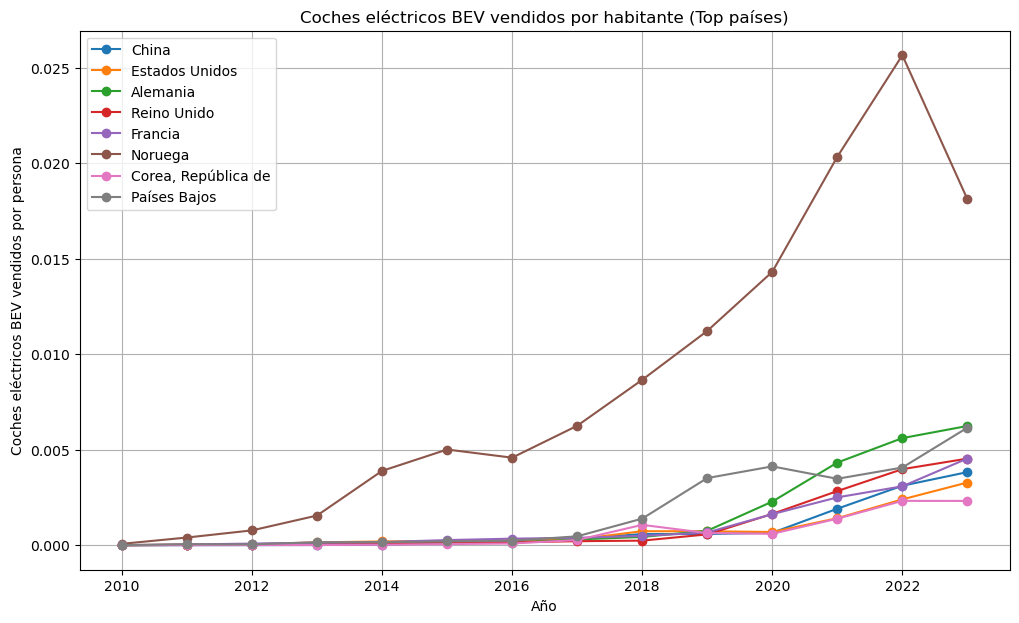

In [99]:
# Mapeo entre nombres de países entre datasets
country_map = {
    "China": "China",
    "Estados Unidos": "USA",
    "Alemania": "Germany",
    "Reino Unido": "United Kingdom",
    "Francia": "France",
    "Noruega": "Norway",
    "Corea, República de": "Korea",
    "Países Bajos": "Netherlands"
}

plt.figure(figsize=(12,7))

for pop_name, sales_name in country_map.items():
    # Ventas BEV por año para el país (en inglés)
    country_bev = bev_by_country[bev_by_country['region'] == sales_name].set_index('year')['value']
    # Población por año para el país (en español)
    country_population = df_poblacion_filtrada[df_poblacion_filtrada['Country Name'] == pop_name]
    # Años disponibles en ambos datasets
    years = country_bev.index.intersection([int(y) for y in df_poblacion_filtrada.columns[1:15]])
    bev_per_person = [
        country_bev[year] / country_population[str(year)].values[0]
        for year in years
    ]
    plt.plot(list(years), bev_per_person, marker='o', label=pop_name)

plt.title('Coches eléctricos BEV vendidos por habitante (Top países)')
plt.xlabel('Año')
plt.ylabel('Coches eléctricos BEV vendidos por persona')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Porcentaje de electricos por población
for pop_name, sales_name in country_map.items():
    country_bev = bev_by_country[bev_by_country['region'] == sales_name].set_index('year')['value']
    country_population = df_poblacion_filtrada[df_poblacion_filtrada['Country Name'] == pop_name]
    if 2023 in country_bev.index and '2023' in country_population.columns:
        bev = country_bev[2023]
        pop = country_population['2023'].values[0]
        porcentaje = (bev / pop) * 100
        print(f"{pop_name} (2023): {porcentaje:.5f}%")


China (2023): 0.38279%
Estados Unidos (2023): 0.32844%
Alemania (2023): 0.62440%
Reino Unido (2023): 0.45355%
Francia (2023): 0.45396%
Noruega (2023): 1.81173%
Corea, República de (2023): 0.23205%
Países Bajos (2023): 0.61531%


### Conclusiones

Como comentaba en el apartado anterior, aunque China sea el país con más ventas de coches eléctricos, si lo comparamos con su población vemos que no representa una gran adopción, donde sí que destaca **Noruega**, donde casi un **2%** de la población tiene un coche eléctrico, mientras que **China** se queda con un **0,38%**.

## Comparativa de los coches eléctricos respecto a las ventas totales de coches

In [101]:
# Cargar y visualizar el archivo CSV scraped_data.csv
scraped_df = pd.read_csv('scraped_data.csv')
display(scraped_df)

,Country,2005 Sales,2006 Sales,2007 Sales,2008 Sales,2009 Sales,2010 Sales,2011 Sales,2012 Sales,2013 Sales,2014 Sales,2015 Sales,2016 Sales,2017 Sales,2018 Sales,2019 Sales,2020 Sales,2021 Sales,2022 Sales
0,China,"3,971,101","5,175,961","6,297,538","6,755,609","10,331,315","13,757,794","14,472,416","15,495,240","17,927,730","19,707,677","21,210,339","24,376,902","24,718,321","23,709,782","21,472,092","20,177,731","21,481,537","23,563,287"
1,India,"1,106,863","1,311,373","1,511,812","1,545,414","1,816,878","2,387,197","2,510,313","2,781,919","2,553,979","2,570,736","2,772,270","2,966,637","3,229,109","3,394,756","2,962,115","2,433,464","3,082,279","3,792,356"
2,Japan,"4,748,482","4,612,318","4,325,508","4,184,266","3,905,310","4,203,181","3,509,036","4,572,333","4,562,282","4,699,591","4,215,889","4,146,459","4,386,378","4,391,160","4,301,091","3,809,977","3,675,698","3,448,297"
3,USA,"7,659,983","7,761,592","7,562,334","6,769,107","5,400,890","5,635,432","6,089,403","7,241,900","7,585,341","7,749,432","7,516,826","6,872,729","6,080,229","5,303,580","4,719,710","3,401,838","3,350,050","2,858,575"
4,Germany,"3,319,259","3,467,961","3,148,163","3,090,040","3,807,175","2,916,259","3,173,634","3,082,504","2,952,431","3,036,773","3,206,042","3,351,607","3,441,262","3,435,778","3,607,258","2,917,678","2,622,132","2,651,357"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Uruguay,"10,000","10,000","12,000","15,000","30,000","40,000","38,308","38,109","41,785","40,171","39,472","35,924","41,549","34,377","30,063",NaN,NaN,NaN
137,Venezuela,"128,601","184,108","267,932","135,882","67,047","68,210","65,339","60,776","43,887","10,400","7,700","3,200","2,500","1,159","3,000",NaN,NaN,NaN
138,Yemen,"4,000","4,700","4,800","5,000","5,000","2,000","2,000","2,000","2,000","2,500","2,300","1,100",828,552,552,NaN,NaN,NaN
139,Zambia,"2,300","2,700","2,800","2,600","3,000","2,000","2,000","2,000","2,000","2,000","1,700","2,300",848,"1,118","1,094",NaN,NaN,NaN


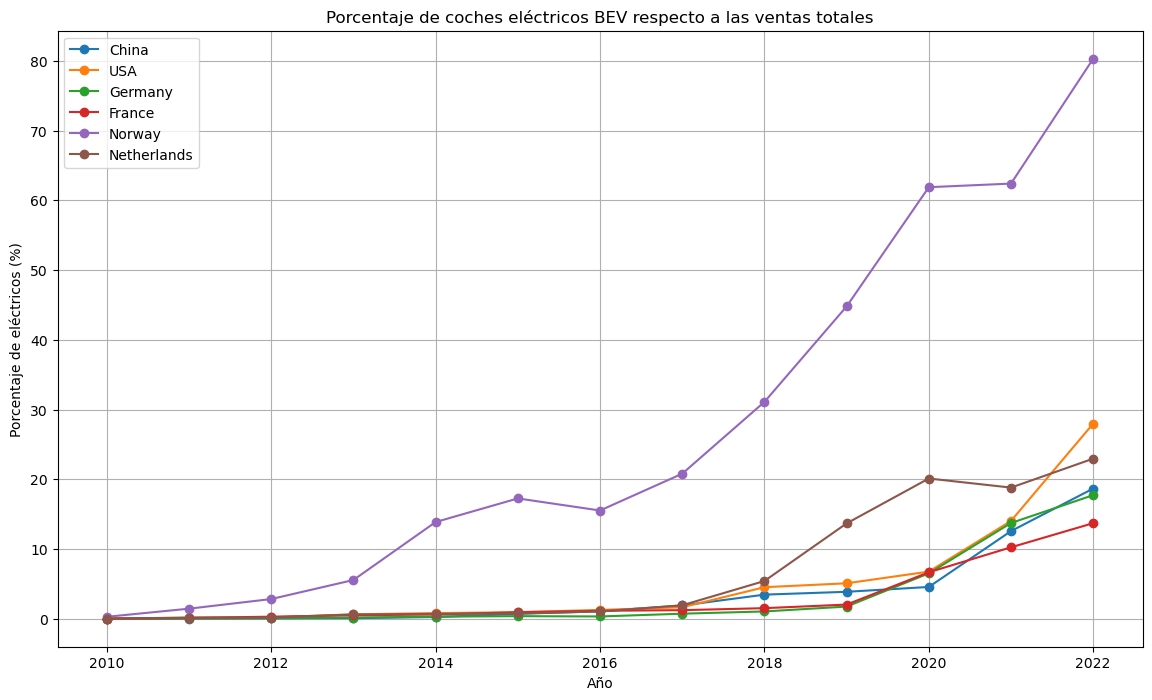

In [102]:
paises_grafica = ['China', 'USA', 'Germany', 'United Kingdom', 'France', 'Norway', 'Korea', 'Netherlands']

ventas_totales_dict = {}
for pais in paises_grafica:
    row = scraped_df[scraped_df['Country'] == pais]
    if not row.empty:
        ventas_totales = []
        years = []
        for year in range(2010, 2023+1):
            col = f"{year} Sales"
            if col in row.columns:
                val = row.iloc[0][col]
                try:
                    ventas_totales.append(int(str(val).replace(',', '')))
                    years.append(year)
                except:
                    ventas_totales.append(None)
                    years.append(year)
        ventas_totales_dict[pais] = (years, ventas_totales)

bev_by_country = df_sales[df_sales['powertrain'] == 'BEV'].groupby(['region', 'year'])['value'].sum().reset_index()

plt.figure(figsize=(14,8))
for pais in paises_grafica:
    if pais in ventas_totales_dict:
        years, ventas_totales = ventas_totales_dict[pais]
        data_bev = bev_by_country[bev_by_country['region'] == pais]
        porcentaje_electricos = []
        for y, total in zip(years, ventas_totales):
            if total and not data_bev[data_bev['year'] == y].empty:
                bev = data_bev[data_bev['year'] == y]['value'].values[0]
                porcentaje = 100 * bev / total
                porcentaje_electricos.append(porcentaje)
            else:
                porcentaje_electricos.append(None)
        plt.plot(years, porcentaje_electricos, marker='o', label=pais)

plt.title('Porcentaje de coches eléctricos BEV respecto a las ventas totales')
plt.xlabel('Año')
plt.ylabel('Porcentaje de eléctricos (%)')
plt.legend()
plt.grid(True)

## Conclusiones porcentaje de coches 100% eléctrico por país

Con la incorporación del nuevo DataSet podemos ver lo que representan los coches eléctricos respecto a las demás tecnologías, como el de combustión, híbridos...

Y ahora sí que podemos concluir con que **Noruega** es el país con mayor adopción del coche eléctrico, llegando al **80% de la cutoa de mercado**, mientras que **China**, aun teniendo muchas ventas de coches eléctricos solamente representa un **18% de la cutoa del mercado** respecto a coches de otra tecnología.

# Análisis del mercado español
![Coche eléctrico en España](https://img2.rtve.es/im/16213969/?w=900)

Si bien hemos observado que, a nivel mundial, las ventas de vehículos 100% eléctricos han superado a las de los híbridos enchufables, es importante analizar cómo se ha comportado esta tendencia específicamente en el mercado español. A continuación, se examina en detalle la evolución y particularidades del mercado de vehículos eléctricos en España.

In [103]:
# Filtrar el DataFrame para quedarnos solo con los datos de España
df_spain = df_sales[df_countries["region"] == "Spain"]
display(df_spain)

/var/folders/3d/48llkznn5fg4rygtv3g055sc0000gn/T/ipykernel_9533/4063809978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spain = df_sales[df_countries["region"] == "Spain"]


,region,category,parameter,mode,powertrain,year,unit,value
3030,Spain,Historical,EV sales,Cars,BEV,2010,Vehicles,76.0
3035,Spain,Historical,EV sales,Cars,BEV,2011,Vehicles,390.0
3037,Spain,Historical,EV sales,Cars,PHEV,2011,Vehicles,8.0
3040,Spain,Historical,EV sales,Cars,PHEV,2012,Vehicles,110.0
3042,Spain,Historical,EV sales,Cars,BEV,2012,Vehicles,430.0
3047,Spain,Historical,EV sales,Cars,BEV,2013,Vehicles,810.0
3049,Spain,Historical,EV sales,Cars,PHEV,2013,Vehicles,72.0
3052,Spain,Historical,EV sales,Cars,PHEV,2014,Vehicles,330.0
3054,Spain,Historical,EV sales,Cars,BEV,2014,Vehicles,1400.0
3059,Spain,Historical,EV sales,Cars,BEV,2015,Vehicles,1300.0


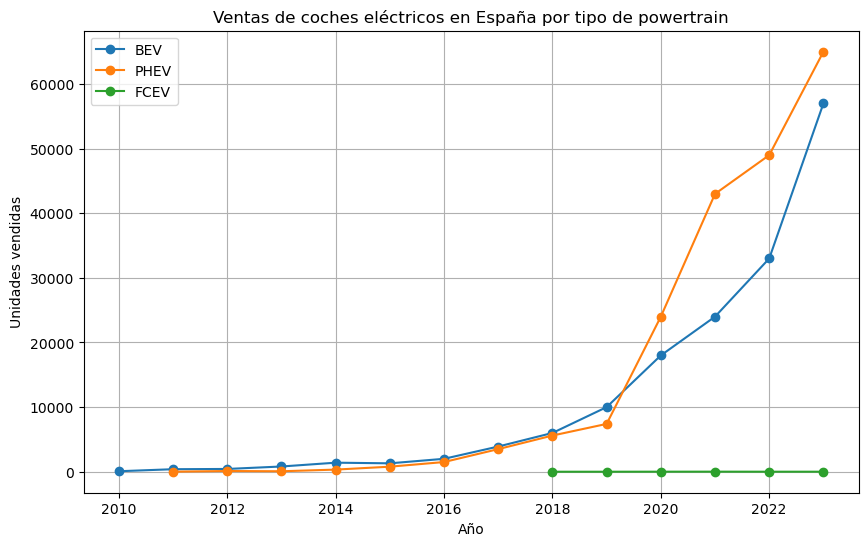

In [104]:
# Filtrar datos de España por tipo de powertrain
bev_spain = df_spain[df_spain['powertrain'] == 'BEV'].groupby('year')['value'].sum()
phev_spain = df_spain[df_spain['powertrain'] == 'PHEV'].groupby('year')['value'].sum()
fcev_spain = df_spain[df_spain['powertrain'] == 'FCEV'].groupby('year')['value'].sum()

# Crear el gráfico comparativo
plt.figure(figsize=(10,6))
plt.plot(bev_spain.index, bev_spain.values, marker='o', label='BEV')
plt.plot(phev_spain.index, phev_spain.values, marker='o', label='PHEV')
plt.plot(fcev_spain.index, fcev_spain.values, marker='o', label='FCEV')
plt.title('Ventas de coches eléctricos en España por tipo de powertrain')
plt.xlabel('Año')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones sobre el mercado español

Tal y como se ha expuesto en apartados anteriores, en España la opción del coche híbrido enchufable ha tenido una mayor aceptación entre aquellos usuarios que mostraban escepticismo respecto a la viabilidad del vehículo 100% eléctrico en su día a día, principalmente por preocupaciones relacionadas con la autonomía y la disponibilidad de puntos de recarga. Estas barreras, sin embargo, han sido superadas en mercados más avanzados y con mayor inversión, como es el caso de los países nórdicos, destacando especialmente Noruega.

El análisis de la gráfica revela que, aunque ambas tecnologías experimentaron un crecimiento acelerado a partir de 2016, el mercado de los híbridos enchufables superó al de los eléctricos puros, especialmente durante el periodo 2019-2022. No obstante, en el último año analizado (2023) se observa una convergencia en las cifras de ventas de ambas tecnologías.

En conclusión, al comparar la evolución del mercado español con la tendencia global, se puede anticipar que en los próximos años las ventas de vehículos eléctricos puros continuarán creciendo y, previsiblemente, terminarán superando a las de los híbridos enchufables, siguiendo la senda marcada por otros mercados internacionales más avanzados.

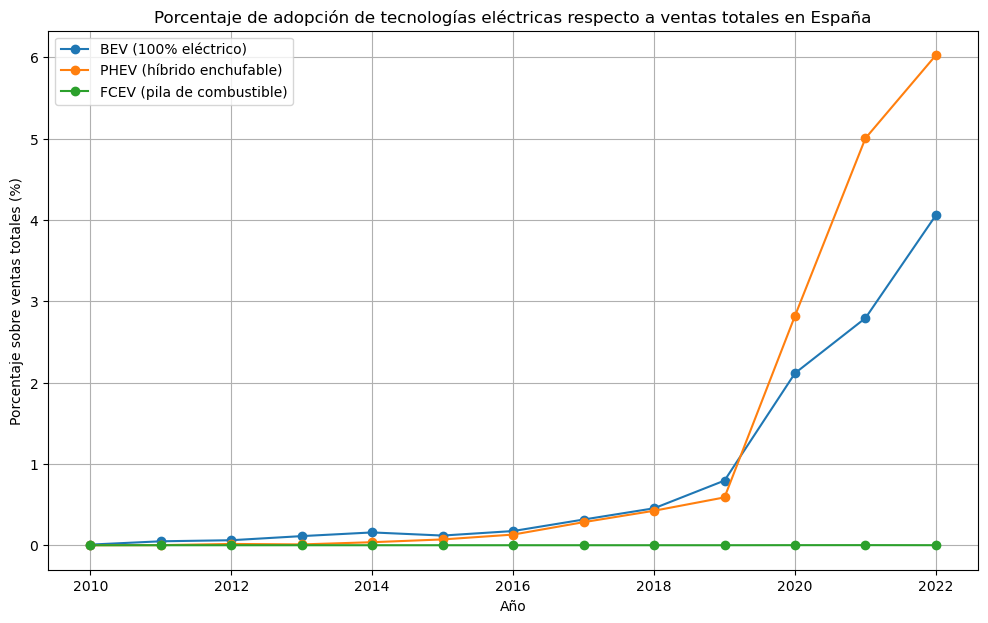

In [105]:
# Obtener ventas totales de coches en España por año desde scraped_df (hasta 2022)
row_spain = scraped_df[scraped_df['Country'] == 'Spain']
years = list(range(2010, 2022+1))
ventas_totales = []
for year in years:
    col = f"{year} Sales"
    if col in row_spain.columns:
        val = row_spain.iloc[0][col]
        try:
            ventas_totales.append(int(str(val).replace(',', '')))
        except:
            ventas_totales.append(None)
    else:
        ventas_totales.append(None)

# Obtener ventas por tecnología en España
bev_spain = df_spain[df_spain['powertrain'] == 'BEV'].set_index('year')['value']
phev_spain = df_spain[df_spain['powertrain'] == 'PHEV'].set_index('year')['value']
fcev_spain = df_spain[df_spain['powertrain'] == 'FCEV'].set_index('year')['value']

porcentaje_bev = []
porcentaje_phev = []
porcentaje_fcev = []

for i, year in enumerate(years):
    total = ventas_totales[i]
    if total and year in bev_spain.index:
        porcentaje_bev.append(100 * bev_spain[year] / total)
    else:
        porcentaje_bev.append(0)
    if total and year in phev_spain.index:
        porcentaje_phev.append(100 * phev_spain[year] / total)
    else:
        porcentaje_phev.append(0)
    if total and year in fcev_spain.index:
        porcentaje_fcev.append(100 * fcev_spain[year] / total)
    else:
        porcentaje_fcev.append(0)

plt.figure(figsize=(12,7))
plt.plot(years, porcentaje_bev, marker='o', label='BEV (100% eléctrico)')
plt.plot(years, porcentaje_phev, marker='o', label='PHEV (híbrido enchufable)')
plt.plot(years, porcentaje_fcev, marker='o', label='FCEV (pila de combustible)')
plt.title('Porcentaje de adopción de tecnologías eléctricas respecto a ventas totales en España')
plt.xlabel('Año')
plt.ylabel('Porcentaje sobre ventas totales (%)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones sobre los porcentajes de cuota de mercado en España

El mercado español, en comparación con el resto del mundo, presenta un notable retraso en la adopción de vehículos eléctricos e híbridos. Actualmente, los vehículos híbridos enchufables representan aproximadamente un 6% de las ventas totales, mientras que los vehículos 100% eléctricos apenas alcanzan el 4%. Estos datos reflejan una penetración significativamente menor respecto a la media internacional, evidenciando la necesidad de impulsar políticas y medidas que fomenten una mayor adopción de tecnologías sostenibles en el sector automovilístico español.

# Conclusiones finales sobre la evolución de las ventas de coches eléctricos

A lo largo del análisis realizado, se observa una clara tendencia de crecimiento en las ventas de coches eléctricos a nivel mundial. Desde 2010, las ventas han experimentado un crecimiento exponencial, especialmente a partir de 2016, impulsadas por la mejora tecnológica, la reducción de costes de las baterías y el apoyo de políticas públicas en muchos países.

## Evolución global

- **BEV (vehículo 100% eléctrico)**: Es la tecnología que más ha crecido, superando ampliamente a los híbridos enchufables (PHEV) y dejando muy atrás a los vehículos de pila de combustible (FCEV), que no han conseguido despegar.
- **Mercados líderes**: China lidera en volumen absoluto de ventas, seguida por Estados Unidos y varios países europeos como Alemania, Reino Unido, Francia, Noruega y Países Bajos.
- **Adopción relativa**: Aunque China tiene el mayor número de ventas, países como Noruega destacan por la penetración relativa, llegando a cuotas de mercado superiores al 80% y un porcentaje de población con coche eléctrico cercano al 2%.

## Situación actual en España

- **Ventas**: España ha mostrado un crecimiento en las ventas de eléctricos, pero a un ritmo más lento que los países líderes. El mercado español ha estado dominado por los híbridos enchufables, aunque en los últimos años las ventas de BEV se han aproximado a las de PHEV.
- **Cuota de mercado**: La cuota de mercado de los eléctricos puros en España ronda el 4%, mientras que los híbridos enchufables alcanzan el 6%. Estas cifras están muy por debajo de la media europea y mundial.
- **Factores limitantes**: Entre los factores que explican este retraso destacan la menor infraestructura de recarga, incentivos menos atractivos y una percepción de menor autonomía y practicidad.

## Perspectivas de futuro

- **Tendencia**: Todo apunta a que la tendencia de crecimiento continuará, especialmente a medida que se refuerce la infraestructura de recarga, se amplíen los incentivos y los fabricantes ofrezcan una mayor variedad de modelos a precios más competitivos.
- **España**: Se espera que España siga la senda de otros mercados europeos, con un aumento progresivo de la cuota de eléctricos puros, superando a los híbridos enchufables en los próximos años.
- **Global**: A nivel global, la electrificación del parque automovilístico parece imparable, con previsiones de que los eléctricos representen una parte cada vez mayor de las ventas totales de vehículos, impulsados por la regulación y la concienciación medioambiental.

En resumen, el coche eléctrico ha pasado de ser una alternativa marginal a convertirse en el eje central de la transformación del sector automovilístico, y aunque España va por detrás, la tendencia es clara y el crecimiento será cada vez más acelerado.

# Bibliografia

## DataSets utilizados
- [Electric car sales (2010-2024)](https://www.kaggle.com/datasets/jainaru/electric-car-sales-2010-2024)
- [Total Worldwide Passenger Cars Sales](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/total-worldwide-passenger-cars-sales)
- [DataSet población mundial](https://datos.bancomundial.org/indicador/SP.POP.TOTL?end=2023&start=1960&view=chart)